# Feature Importance

In [3]:
!pip install lightgbm

In [9]:
BASE_DIR = '/mnt/ceph/storage/data-in-progress/data-research/web-search/TREC-21/lightgbm/all-50-features/'
TRAIN_APPROACHES = !ls $BASE_DIR |grep 'train-with-'

In [11]:
def load_model(training_approach):
    from lightgbm import Booster
    print('Load model: ' + training_approach)
    return Booster(model_file=BASE_DIR + training_approach + '/LightGBM_model.txt')

def plot_importance(model):
    from lightgbm import plot_importance
    return plot_importance(model, height=1,dpi=1024, figsize=(8,16))

#plot_importance(load_model(TRAIN_APPROACHES[1]))

In [15]:
def importance(model_name):
    import json
    import pandas as pd
    model = load_model(model_name)
    feature_name = json.load(open('/mnt/ceph/storage/data-in-progress/data-research/web-search/TREC-21/lightgbm/all-features.jsonl'))
    feature_importance = model.feature_importance(importance_type='split')
    split_importance = {}
    for i in range(len(feature_importance)):
        split_importance[str(i)] = feature_importance[i]
            
    feature_importance = model.feature_importance(importance_type='gain')
    gain_importance = {}
    for i in range(len(feature_importance)):
        gain_importance[str(i)] = feature_importance[i]

    ret = []
    for k in feature_name:
        ret += [{
            'model_name': model_name.replace('train-with-', ''),
            'feature_name': feature_name[k],
            'gain_importance': gain_importance[k],
            'split_importance': split_importance[k],
        }]
       
    return pd.DataFrame(ret)

In [16]:
import pandas as pd
df_importance = pd.concat([importance(TRAIN_APPROACHES[0]), importance(TRAIN_APPROACHES[1]), importance(TRAIN_APPROACHES[2])])
df_importance = df_importance.sort_values('gain_importance', ascending=False)
df_importance

Load model: train-with-1000-trees
Load model: train-with-100-trees
Load model: train-with-5000-trees


,model_name,feature_name,gain_importance,split_importance
32,5000-trees,title-tf-idf-similarity,1.578267e+06,2978
32,1000-trees,title-tf-idf-similarity,1.554976e+06,484
32,100-trees,title-tf-idf-similarity,1.547519e+06,104
16,5000-trees,body-spl-similarity,7.098591e+05,4744
16,1000-trees,body-spl-similarity,6.765128e+05,839
...,...,...,...,...
48,100-trees,feature_person_entities,6.682835e+02,6
27,100-trees,title-tf-similarity,5.520597e+02,6
49,1000-trees,feature_query_is_comparative,5.064017e+02,31
47,100-trees,feature_org_entities,2.617580e+02,2


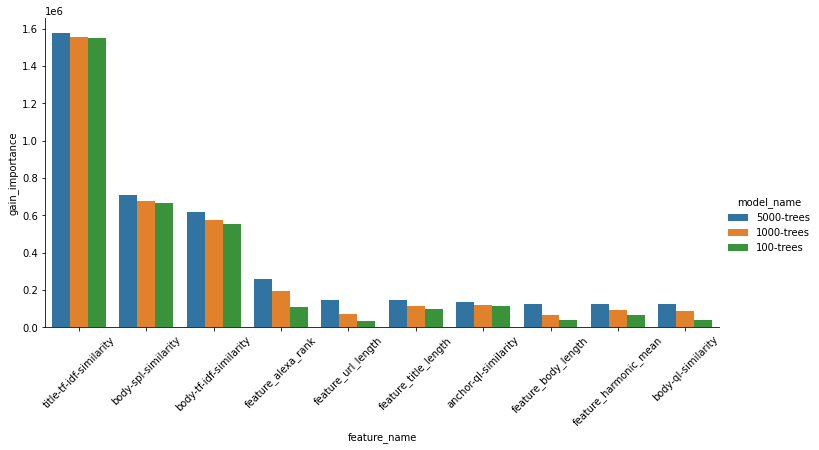

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

most_important_features = [i for i in df_importance[df_importance['model_name'] == '5000-trees'].feature_name[:10]]

ax = sb.catplot(
    #data=df_importance,
    data=df_importance[df_importance['feature_name'].isin(most_important_features)],
    x='feature_name',
    y='gain_importance',
    hue='model_name',
    kind='bar',
    aspect=2,
    #aspect=10
)
plt.xticks(rotation=45)
ax

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

most_important_features = [i for i in df_importance[df_importance['model_name'] == '5000-trees'].feature_name[:10]]

ax = sb.catplot(
    #data=df_importance,
    data=df_importance[df_importance['feature_name'].isin(most_important_features)],
    x='feature_name',
    y='gain_importance',
    hue='model_name',
    kind='bar',
    aspect=2,
    #aspect=10
)
plt.xticks(rotation=45)
ax

In [18]:
[i for i in df_importance[df_importance['model_name'] == '5000-trees'].feature_name]

['title-tf-idf-similarity',
 'body-spl-similarity',
 'body-tf-idf-similarity',
 'feature_alexa_rank',
 'feature_url_length',
 'feature_title_length',
 'anchor-ql-similarity',
 'feature_body_length',
 'feature_harmonic_mean',
 'body-ql-similarity',
 'title-qljm-similarity',
 'anchor-qljm-similarity',
 'body-pl2-similarity',
 'feature_pagerank',
 'body-tf-similarity',
 'body-qljm-similarity',
 'body-f2exp-similarity',
 'body-f2log-similarity',
 'feature_dots_in_host',
 'url-tf-idf-similarity',
 'feature_slashes_in_url',
 'anchor-f2log-similarity',
 'feature_query_length_in_tokens',
 'url-qljm-similarity',
 'anchor-bm25-similarity',
 'title-f2exp-similarity',
 'title-ql-similarity',
 'url-ql-similarity',
 'anchor-f2exp-similarity',
 'body-bm25-similarity',
 'anchor-tf-idf-similarity',
 'url-f2exp-similarity',
 'url-bm25-similarity',
 'anchor-tf-similarity',
 'title-f2log-similarity',
 'anchor-spl-similarity',
 'url-pl2-similarity',
 'url-spl-similarity',
 'title-pl2-similarity',
 'title-s